### Práctica 18 Clustering DB-Scan v2

Durante esta práctica trabajaremos con el modelo DB-Scan y tendremos la posibilidad de ensayar diversos dataset.

Buscaremos los valores optimos de epsilon y MinPts.

En la siguiente dirección podemos encontrar una importante variedad de dataset para clustering

https://github.com/deric/clustering-benchmark?tab=readme-ov-file


#### Métricas:

"Silhouette Score" mide la coherencia de un punto dentro de su propio cluster en comparación con los puntos de otros clusters. 

Un valor cercano a +1 indica que los puntos están bien agrupados.\
Un valor 0 sugiere que están cerca del límite entre clusters.\
Un valor negativo indica que muchos puntos podrían estar en el cluster equivocado.

"Davies-Bouldin Index" evalúa la dispersión de los clusters y la distancia entre ellos. 

Valor bajo: Indica clusters bien separados y son compactos, lo que es ideal. Un valor cercano a 0 es lo mejor.\
Valor alto: Indica clusters solapados o dispersos. No existe un umbral exacto, pero valores cercanos o superiores a 1 suelen sugerir una mala calidad en el clustering.


Clusters encontrados:  {0, 1}

Mejor configuración encontrada: 
epsilon=0.15999999999999998
MinPts=3
Davies-Bouldin Index=1.0989
Silhouette=0.3673


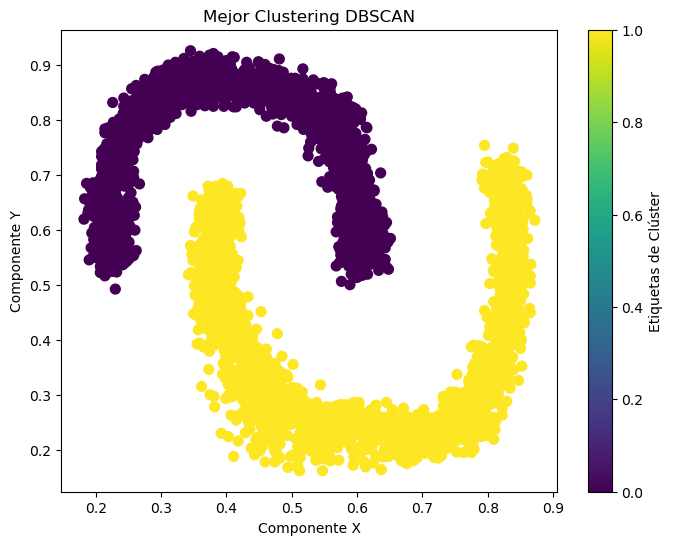

In [ ]:

import numpy as np 
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Función para definir y entrenar el modelo DBSCAN--------------------------------------------------------------

def generar_modelo_DBScan(data, eps, min_samples):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data_scaled)
    return labels

# Función para evaluar la calidad del clustering
def evaluar_clustering(data, labels):
    unique_labels = set(labels)
    if len(unique_labels) > 1:
        silhouette = silhouette_score(data, labels)
        db_index = davies_bouldin_score(data, labels)
    else:
        silhouette = -1  # Valor inválido
        db_index = np.inf  # Valor alto indica mala calidad
    return silhouette, db_index

# Fin funciones ----------------------------------------------------------------------------------------------------

# Cargar los datos
df = pd.read_csv('banana.csv')
features = df.iloc[:, :-1] # extrae las caractersiticas menos la columna correspondiente a la etiqueta de clase

# Definir rangos de valores para eps y MinPts
eps_values = np.arange(0.1, 1.0, 0.01)  # desde 0.1 a 1 en pasos de 0.01
min_pts = range(3, 15, 1)  # desde 3 a 14 en pasos de 1

mejor_silhouette = -1
mejor_eps = None
mejor_min_pts = None
mejor_db_index= None

# Búsqueda de parámetros óptimos
for eps in eps_values:
    for min in min_pts:
        labels = generar_modelo_DBScan(features, eps, min)
        silhouette, db_index = evaluar_clustering(features, labels)
        
        if silhouette > mejor_silhouette:
            mejor_silhouette = silhouette
            mejor_db_index=db_index
            mejor_eps = eps
            mejor_min_pts = min
        
        

# Generar clustering con los mejores parámetros
labels = generar_modelo_DBScan(features, mejor_eps, mejor_min_pts)

# Imprimir el mejor resultado
print("Clusters encontrados: ",set(labels)) 
print("\nMejor configuración encontrada: ") 
print(f"epsilon={mejor_eps}") 
print(f"MinPts={mejor_min_pts}")  
print(f"Davies-Bouldin Index={mejor_db_index:.4f}")  
print(f"Silhouette={mejor_silhouette:.4f}")


# Visualización
plt.figure(figsize=(8, 6))
plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=labels, cmap='viridis', marker='o', s=50)
plt.title("Mejor Clustering DBSCAN")
plt.xlabel("Componente X")
plt.ylabel("Componente Y")
plt.colorbar(label="Etiquetas de Clúster")
plt.show()




Ejercicio: Selecciona y describe dos datset de entre los que encontrarás en la URL indicada en el encabezado de la practica y genera un modelo DB-Scan. Encuantra en cada caso los valores de epsilon y MinPts

### Dataset zoo

##### Descripción

El dataset contiene información sobre diferentes animales y sus características. Sus atributos son:

- HAIR - ¿Tiene pelo? (1 = Sí, 0 = No)

- FEATHERS - ¿Tiene plumas?

- EGGS - ¿Pone huevos?

- MILK - ¿Produce leche?

- AIRBORNE - ¿Puede volar?

- AQUATIC - ¿Vive en el agua?

- PREDATOR - ¿Es un depredador?

- TOOTHED - ¿Tiene dientes?

- BACKBONE - ¿Tiene columna vertebral?

- BREATHES - ¿Respira aire?

- VENOMOUS - ¿Es venenoso?

- FINS - ¿Tiene aletas?

- LEGS - Número de patas (puede ser 0, 2, 4, 6, 8).

- TAIL - ¿Tiene cola?

- DOMESTIC - ¿Es doméstico?

- CATSIZE - ¿Es del tamaño de un gato?

- class - Clase del animal (probablemente una categoría numérica indicando el tipo de animal).

Clusters encontrados:  {0, -1}

Mejor configuración encontrada: 
epsilon=0.1
MinPts=3
Davies-Bouldin Index=3.6242
Silhouette=0.4885


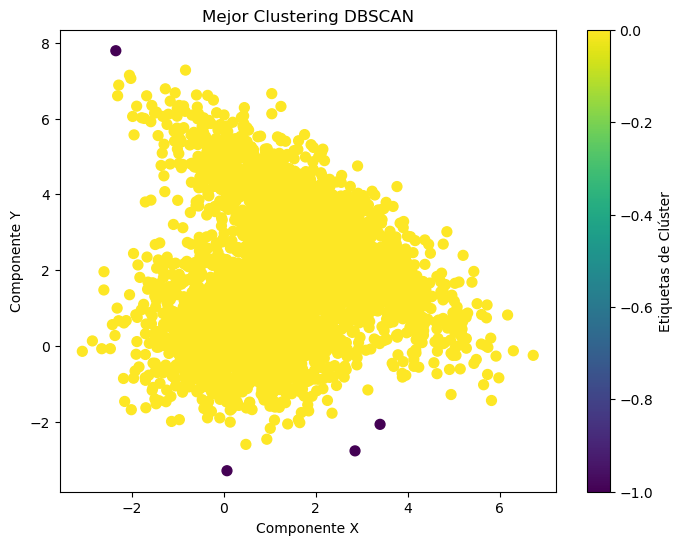

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Función para definir y entrenar el modelo DBSCAN--------------------------------------------------------------

def generar_modelo_DBScan(data, eps, min_samples):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data_scaled)
    return labels

# Función para evaluar la calidad del clustering
def evaluar_clustering(data, labels):
    unique_labels = set(labels)
    if len(unique_labels) > 1:
        silhouette = silhouette_score(data, labels)
        db_index = davies_bouldin_score(data, labels)
    else:
        silhouette = -1  # Valor inválido
        db_index = np.inf  # Valor alto indica mala calidad
    return silhouette, db_index

# Fin funciones ----------------------------------------------------------------------------------------------------

# Cargar los datos
df = pd.read_csv('vehicle.csv')
# features = df.iloc[:, :-1] # extrae las caractersiticas menos la columna correspondiente a la etiqueta de clase
features = df.drop(columns=["Class"])  

# Definir rangos de valores para eps y MinPts
eps_values = np.arange(0.1, 3, 0.1)  # desde 0.1 a 1 en pasos de 0.01
min_pts = range(3, 20, 2)  # desde 3 a 14 en pasos de 1

mejor_silhouette = -1
mejor_eps = None
mejor_min_pts = None
mejor_db_index= None

# Búsqueda de parámetros óptimos
for eps in eps_values:
    for min in min_pts:
        labels = generar_modelo_DBScan(features, eps, min)
        silhouette, db_index = evaluar_clustering(features, labels)
        
        if silhouette > mejor_silhouette:
            mejor_silhouette = silhouette
            mejor_db_index=db_index
            mejor_eps = eps
            mejor_min_pts = min
        
        

# Generar clustering con los mejores parámetros
labels = generar_modelo_DBScan(features, mejor_eps, mejor_min_pts)

# Imprimir el mejor resultado
print("Clusters encontrados: ",set(labels)) 
print("\nMejor configuración encontrada: ") 
print(f"epsilon={mejor_eps}") 
print(f"MinPts={mejor_min_pts}")  
print(f"Davies-Bouldin Index={mejor_db_index:.4f}")  
print(f"Silhouette={mejor_silhouette:.4f}")


# Visualización
plt.figure(figsize=(8, 6))
plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=labels, cmap='viridis', marker='o', s=50)
plt.title("Mejor Clustering DBSCAN")
plt.xlabel("Componente X")
plt.ylabel("Componente Y")
plt.colorbar(label="Etiquetas de Clúster")
plt.show()

